In [1]:
# House Price Prediction using Linear Regression
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

In [2]:
# Import the dataset
df_train = pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv')

In [3]:
# Check the shape of the dataset
print(df_train.shape)
print(df_test.shape)

(1460, 81)
(1459, 80)


In [4]:
# Catetorical features
s = (df_train.dtypes == 'object')
object_cols = list(s[s].index)
print("Categorical variables:", object_cols)
print("Number of Categorical variables:", len(object_cols))

# Numerical features
t = (df_train.dtypes == 'int64') | (df_train.dtypes == 'float64')
num_cols = list(t[t].index)
print("Numerical variables:", num_cols)
print("Number of Numerical variables:", len(num_cols))

Categorical variables: ['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature', 'SaleType', 'SaleCondition']
Number of Categorical variables: 43
Numerical variables: ['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Firepl

In [5]:
# data_description.txt
frame_description = open('data_description.txt', 'r')
print(frame_description.read())
frame_description.close()

MSSubClass: Identifies the type of dwelling involved in the sale.	

        20	1-STORY 1946 & NEWER ALL STYLES
        30	1-STORY 1945 & OLDER
        40	1-STORY W/FINISHED ATTIC ALL AGES
        45	1-1/2 STORY - UNFINISHED ALL AGES
        50	1-1/2 STORY FINISHED ALL AGES
        60	2-STORY 1946 & NEWER
        70	2-STORY 1945 & OLDER
        75	2-1/2 STORY ALL AGES
        80	SPLIT OR MULTI-LEVEL
        85	SPLIT FOYER
        90	DUPLEX - ALL STYLES AND AGES
       120	1-STORY PUD (Planned Unit Development) - 1946 & NEWER
       150	1-1/2 STORY PUD - ALL AGES
       160	2-STORY PUD - 1946 & NEWER
       180	PUD - MULTILEVEL - INCL SPLIT LEV/FOYER
       190	2 FAMILY CONVERSION - ALL STYLES AND AGES

MSZoning: Identifies the general zoning classification of the sale.
		
       A	Agriculture
       C	Commercial
       FV	Floating Village Residential
       I	Industrial
       RH	Residential High Density
       RL	Residential Low Density
       RP	Residential Low Density Park 
       RM

In [6]:
# Combine the dataset for preprocessing
df = pd.concat([df_train, df_test], axis=0, sort=False).reset_index(drop=True)

In [7]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500.0
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500.0
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500.0
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000.0
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000.0


In [8]:
# Shape of the dataset
print(df.shape)

(2919, 81)


In [9]:
# Check the missing values and null values
df.isnull().sum()

Id                  0
MSSubClass          0
MSZoning            4
LotFrontage       486
LotArea             0
                 ... 
MoSold              0
YrSold              0
SaleType            1
SaleCondition       0
SalePrice        1459
Length: 81, dtype: int64

<Axes: >

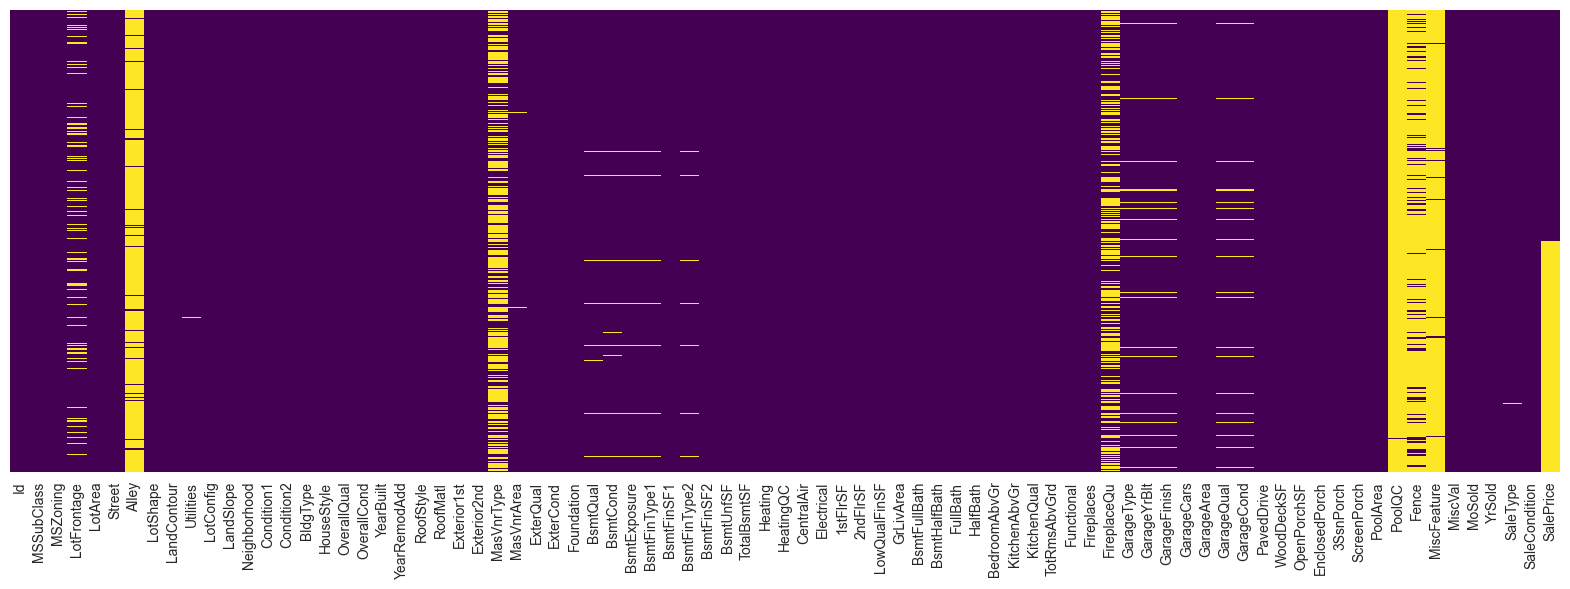

In [10]:
# Heatmap for missing values
plt.figure(figsize=(20, 6))
sns.set_style('dark')
sns.heatmap(df.isnull(), yticklabels=False, cbar=False, cmap='viridis')

In [11]:
# Number of unique values of categorical features
df[object_cols].nunique()

MSZoning          5
Street            2
Alley             2
LotShape          4
LandContour       4
Utilities         2
LotConfig         5
LandSlope         3
Neighborhood     25
Condition1        9
Condition2        8
BldgType          5
HouseStyle        8
RoofStyle         6
RoofMatl          8
Exterior1st      15
Exterior2nd      16
MasVnrType        3
ExterQual         4
ExterCond         5
Foundation        6
BsmtQual          4
BsmtCond          4
BsmtExposure      4
BsmtFinType1      6
BsmtFinType2      6
Heating           6
HeatingQC         5
CentralAir        2
Electrical        5
KitchenQual       4
Functional        7
FireplaceQu       5
GarageType        6
GarageFinish      3
GarageQual        5
GarageCond        5
PavedDrive        3
PoolQC            3
Fence             4
MiscFeature       4
SaleType          9
SaleCondition     6
dtype: int64

C:\Users\anish\AppData\Local\Temp\ipykernel_7032\803961429.py:7: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(11, 4, cnt)


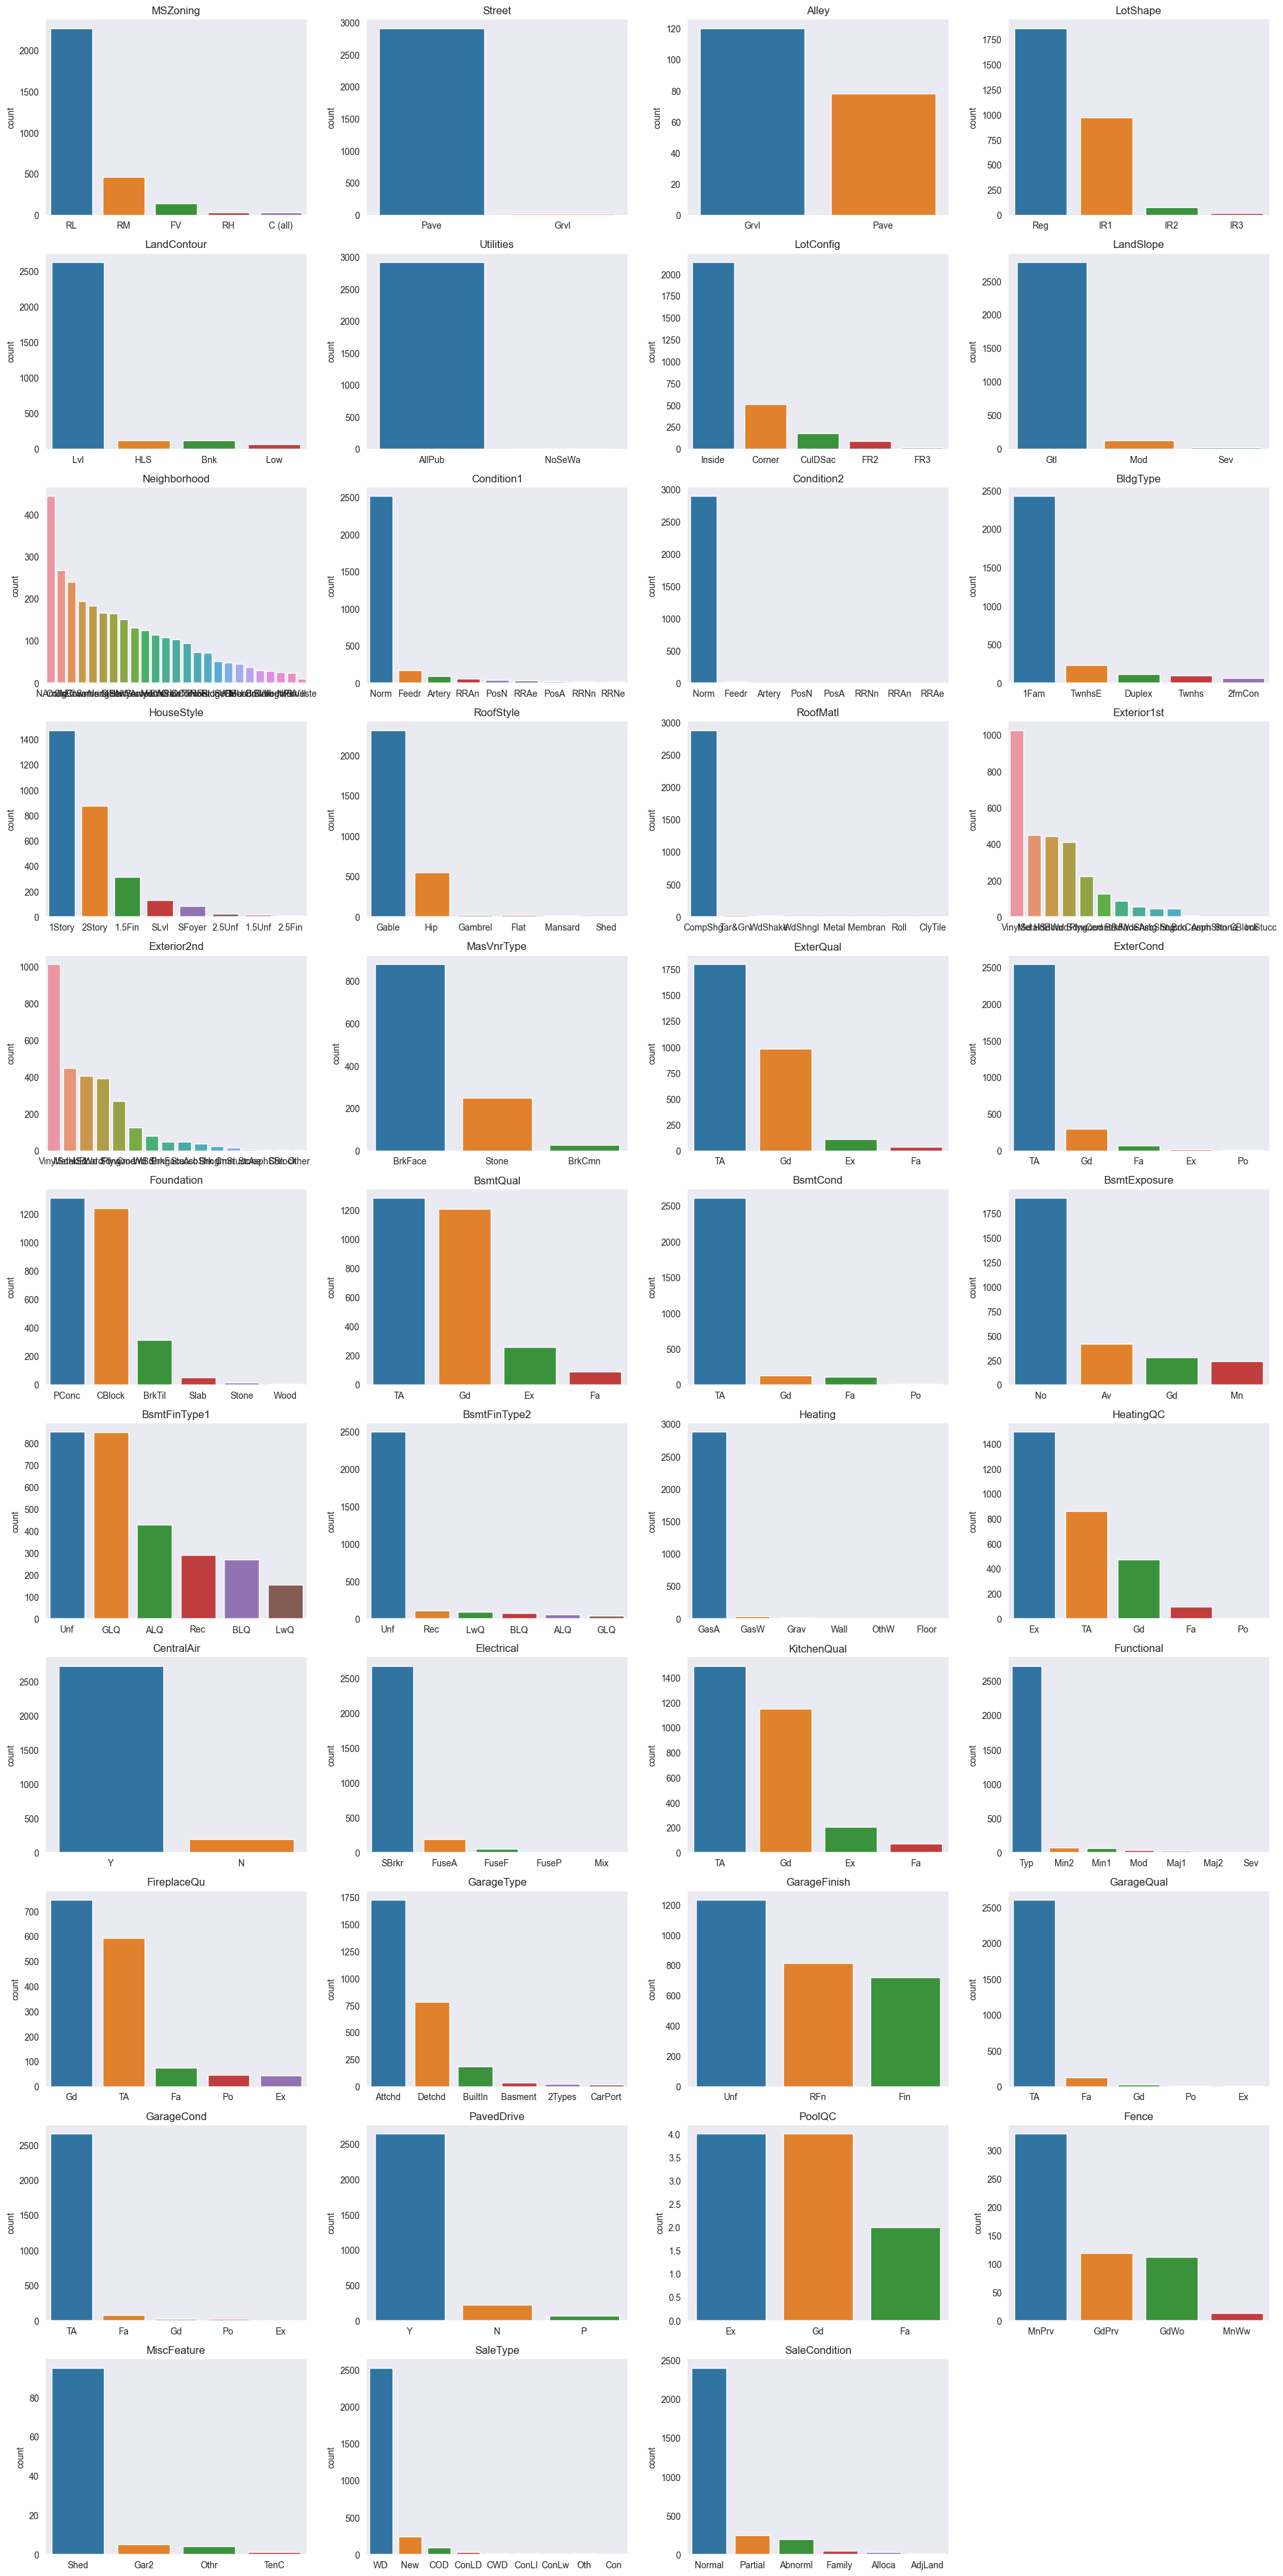

In [12]:
# Categorical feature distribution
plt.figure(figsize=(20, 40))
plt.xticks(rotation=90)
cnt = 1
for i in object_cols:
    y = df[i].value_counts()
    plt.subplot(11, 4, cnt)
    sns.barplot(x = list(y.index), y = y)
    plt.title(i)
    cnt += 1
plt.tight_layout()
plt.show()

### Handle the missing values

In [13]:
# Drop the features 'Alley', 'Fence', and 'MiscFeature'.
df.drop(['Alley', 'Fence', 'MiscFeature'], axis=1, inplace=True)

# Drop 'Utilities' feature, as all but one have the value 'AllPub'
df['Utilities'].value_counts()
df.drop(['Utilities'], axis=1, inplace=True)

# All entries with missing 'FirePlaceQu' have 'Fireplaces' = 0. Hence fill missing values with 'NA'.
df['FireplaceQu'].fillna('NA', inplace=True)

# Basement features: Fill missing values with 'NA' or '0'.
df['BsmtQual'].fillna('NA', inplace=True)
df['BsmtCond'].fillna('NA', inplace=True)
df['BsmtExposure'].fillna('NA', inplace=True)
df['BsmtFinType1'].fillna('NA', inplace=True)
df['BsmtFinType2'].fillna('NA', inplace=True)
df['BsmtFinSF1'].fillna(0, inplace=True)
df['BsmtFinSF2'].fillna(0, inplace=True)
df['BsmtUnfSF'].fillna(0, inplace=True)
df['TotalBsmtSF'].fillna(0, inplace=True)
df['BsmtFullBath'].fillna(0, inplace=True)
df['BsmtHalfBath'].fillna(0, inplace=True)

# Garage features: Fill missing values with 'NA' or '0'.
df['GarageType'].fillna('NA', inplace=True)
df['GarageYrBlt'].fillna(0, inplace=True)
df['GarageFinish'].fillna('NA', inplace=True)
df['GarageQual'].fillna('NA', inplace=True)
df['GarageCond'].fillna('NA', inplace=True)
df['GarageCars'].fillna(0, inplace=True)
df['GarageArea'].fillna(0, inplace=True)

# Handle missing values with mode
df['MSZoning'].fillna(df['MSZoning'].mode()[0], inplace=True)
df['Exterior1st'].fillna(df['Exterior1st'].mode()[0], inplace=True)
df['Exterior2nd'].fillna(df['Exterior2nd'].mode()[0], inplace=True)
df['MasVnrType'].fillna(df['MasVnrType'].mode()[0], inplace=True)
df['MasVnrArea'].fillna(df['MasVnrArea'].mode()[0], inplace=True)
df['Electrical'].fillna(df['Electrical'].mode()[0], inplace=True)
df['KitchenQual'].fillna(df['KitchenQual'].mode()[0], inplace=True)
df['Functional'].fillna(df['Functional'].mode()[0], inplace=True)

In [14]:
# Handle missing values with mean
df['LotFrontage'].fillna(df['LotFrontage'].mean(), inplace=True)

In [15]:
# Handle missing values of 'SaleType' with mode
df['SaleType'].fillna(df['SaleType'].mode()[0], inplace=True)

In [16]:
# Check the missing values and null values
df.isnull().sum()

Id                  0
MSSubClass          0
MSZoning            0
LotFrontage         0
LotArea             0
                 ... 
MoSold              0
YrSold              0
SaleType            0
SaleCondition       0
SalePrice        1459
Length: 77, dtype: int64

In [17]:
# Drop the features 'Id' and 'SalePrice'
df.drop(['Id', 'SalePrice'], axis=1, inplace=True)

In [18]:
df.isnull().sum().sum()

2909

In [19]:
# Show the features with missing values
df.columns[df.isnull().any()]

Index(['PoolQC'], dtype='object')

In [20]:
# All but one entries with missing 'PoolQC' value have 'PoolArea' = 0. Use mode for missing value with non-zero PoolArea. Use 'NA' for the rest of the entries.
df['PoolQC'].fillna('NA', inplace=True)
df['PoolQC'].value_counts()
df.loc[(df['PoolQC'] == 'NA') & (df['PoolArea'] > 0), 'PoolQC'] = df['PoolQC'].mode()[0]

In [21]:
df.isnull().sum().sum()

0

In [22]:
df.shape

(2919, 75)

### Data Preprocessing

In [23]:
from sklearn.preprocessing import OneHotEncoder

In [24]:
# Number of categorical features
s = (df.dtypes == 'object')
object_cols = list(s[s].index)
print("Categorical variables:", object_cols)
print("Number of Categorical variables:", len(object_cols))

Categorical variables: ['MSZoning', 'Street', 'LotShape', 'LandContour', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC', 'SaleType', 'SaleCondition']
Number of Categorical variables: 39


In [25]:
# One-hot encoding
OH_encoder = OneHotEncoder(sparse=False)
OH_cols = pd.DataFrame(OH_encoder.fit_transform(df[object_cols]))
OH_cols.index = df.index
OH_cols.columns = OH_encoder.get_feature_names_out(object_cols)
df_final = df.drop(object_cols, axis=1)
df_final = pd.concat([df_final, OH_cols], axis=1)

C:\Users\anish\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\preprocessing\_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [26]:
df_final.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,60,65.0,8450,7,5,2003,2003,196.0,706.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1,20,80.0,9600,6,8,1976,1976,0.0,978.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
2,60,68.0,11250,7,5,2001,2002,162.0,486.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
3,70,60.0,9550,7,5,1915,1970,0.0,216.0,0.0,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
4,60,84.0,14260,8,5,2000,2000,350.0,655.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0


In [27]:
# Check the data types of the features after one-hot encoding and return the number of features of each data type
df_final.dtypes.value_counts()

float64    261
int64       25
Name: count, dtype: int64

In [28]:
df.dtypes[df.dtypes != df.dtypes.iloc[0]]

MSZoning          object
LotFrontage      float64
Street            object
LotShape          object
LandContour       object
LotConfig         object
LandSlope         object
Neighborhood      object
Condition1        object
Condition2        object
BldgType          object
HouseStyle        object
RoofStyle         object
RoofMatl          object
Exterior1st       object
Exterior2nd       object
MasVnrType        object
MasVnrArea       float64
ExterQual         object
ExterCond         object
Foundation        object
BsmtQual          object
BsmtCond          object
BsmtExposure      object
BsmtFinType1      object
BsmtFinSF1       float64
BsmtFinType2      object
BsmtFinSF2       float64
BsmtUnfSF        float64
TotalBsmtSF      float64
Heating           object
HeatingQC         object
CentralAir        object
Electrical        object
BsmtFullBath     float64
BsmtHalfBath     float64
KitchenQual       object
Functional        object
FireplaceQu       object
GarageType        object


In [29]:
# Check if the shape is consistent
print(df.shape)
print(df_final.shape)
print(df_train.shape)
print(df_test.shape)

(2919, 75)
(2919, 286)
(1460, 81)
(1459, 80)


In [30]:
# Split the dataset into train and test
X_train = df_final.iloc[:1460, :]
X_test = df_final.iloc[1460:, :]
y_train = df_train['SalePrice']

In [31]:
# Check the consistency of the split
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)

(1460, 286)
(1459, 286)
(1460,)


In [32]:
# Split the train dataset into train and validation
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=0)

## Model Building
__Linear Regression__

In [33]:
# Linear Regression
reg = LinearRegression()
reg.fit(X_train, y_train)

LinearRegression()

In [34]:
from sklearn.metrics import mean_absolute_error

In [35]:
# Predict the validation set
y_pred = reg.predict(X_val)

# The mean squared error
print('Mean squared error: %.2f' % mean_squared_error(y_val, y_pred))

# The mean absolute error
print('Mean absolute error: %.2f' % mean_absolute_error(y_val, y_pred))

Mean squared error: 3450893903.48
Mean absolute error: 22874.61


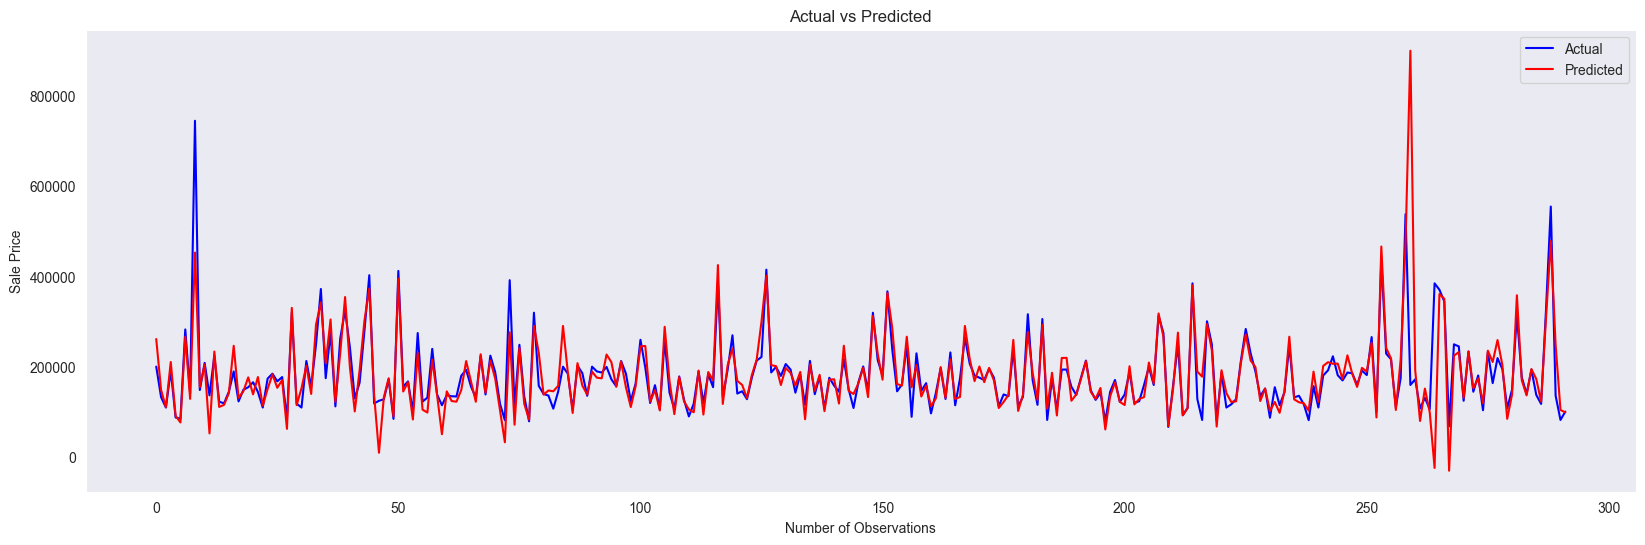

In [37]:
# Plot the predicted values against the actual values
plt.figure(figsize=(20, 6))
plt.plot(y_val.values, color='blue', label='Actual')
plt.plot(y_pred, color='red', label='Predicted')
plt.title('Actual vs Predicted')
plt.xlabel('Number of Observations')
plt.ylabel('Sale Price')
plt.legend()
plt.show()

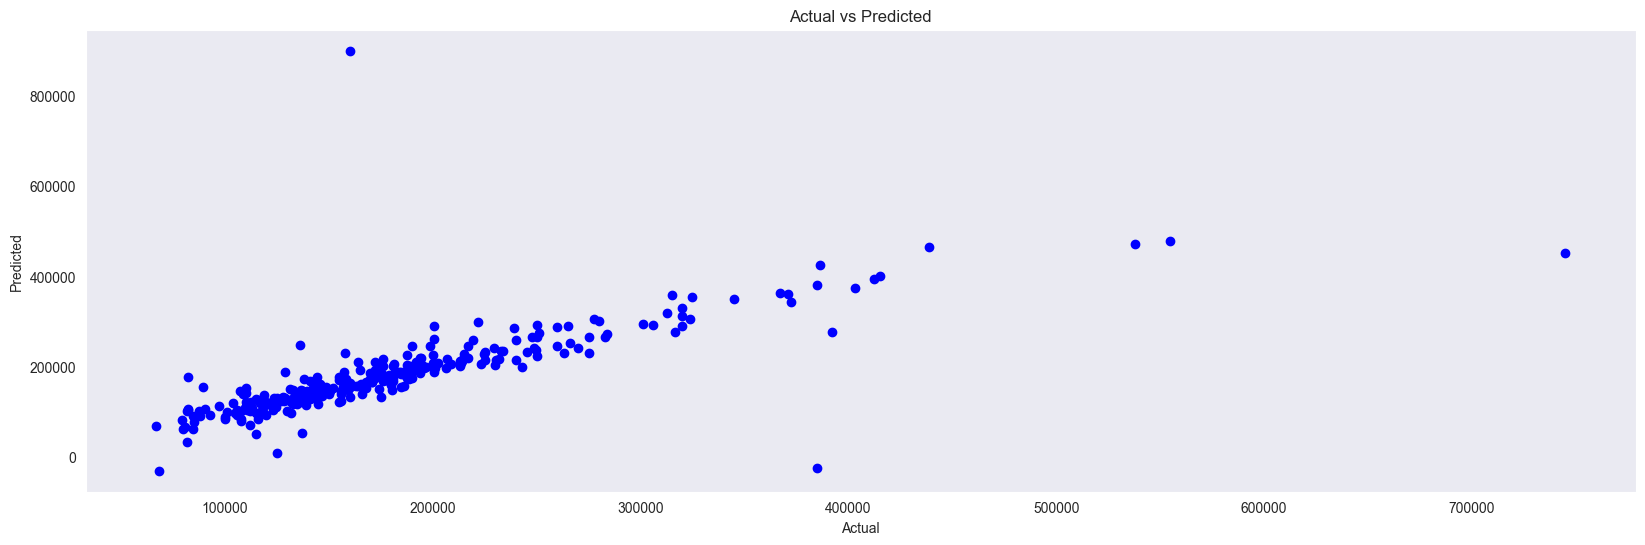

In [38]:
# Scatter plot of the predicted values against the actual values
plt.figure(figsize=(20, 6))
plt.scatter(y_val.values, y_pred, color='blue')
plt.title('Actual vs Predicted')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.show()